# Welcome to Manim!

This is a temporary test environment in which you can play around with Manim without the need of installing it locally. Some basic knowledge of Python is helpful! Keep in mind that this is a *temporary* environment, though: your changes will not be saved and cannot be shared with others. To save your work, you will need to download the notebook file ("File > Download as > Notebook (.ipynb)"). Enjoy!

> *Useful resources:* [Documentation](https://docs.manim.community), [Discord](https://discord.gg/mMRrZQW), [Reddit](https://www.reddit.com/r/manim/)

## Setup

We begin our short walkthrough by importing everything from the library. Run the following code cell to do so (focus the cell and hit the *Run* button above, or press `Shift`+`Enter` – you can find more information about how to navigate and work with Jupyter notebooks in the *Help* menu at the top of this page).

The second line controls the maximum width used to display videos in this notebook, feel free to adapt it.

In [2]:
from manim import *

config.media_width = "60%"

Manim Community v0.15.2

In [176]:
%%manim -s -v WARNING CSV
import numpy as np
import pandas as pd

data = "C:/Manim_3_feb/manim/Presentation_PhD/Spectre"

class CSV(Scene):
    def construct(self):
        self.camera.background_color = BLACK
        coords = self.return_coords_from_csv(data)
        # -------
        axes_demand = (
            Axes(
                x_range=[0, 5.5, 1],
                y_range=[0, 0.14, 0.02],
                x_length=5,
                y_length=3,
                color=YELLOW,
                axis_config={
                    "include_tip": True,
                },
            )
            .add_coordinates().to_edge(LEFT, buff = 0.5)
        )
        x_lab_D = Text("T (s)",).scale(0.35)
        y_lab_D= Text("Sa/g").scale(0.35)
        axis_labels_D = always_redraw(lambda: axes_demand.get_axis_labels(x_label=x_lab_D, y_label=y_lab_D))
        title_lab_D = Text("Capacity curve").scale(0.45).move_to(axes_demand.get_center())
        self.add(title_lab_D, axis_labels_D)
        # Create all the dots
        dot_group = VGroup()
        for p in coords:
            dot_group.add(Dot(axes_demand.c2p(p[0], p[1]), radius = 0.01))
            
        line_group = VGroup()
        for i in range(len(coords)-1):
            line_group.add(Line(start = dot_group[i].get_center(), 
                               end = dot_group[i+1].get_center())).set(color=[YELLOW,GREEN])
        self.play(FadeIn(axes_demand))
        # self.play(Create(dot_group[0]))
        '''for i in range(len(coords)-1):
            self.play(Write(line_group[i]), FadeIn(dot_group[i+1]), run_time = 1-i/12)'''
        self.play(Create(line_group))
        self.wait(2)
        # -------
        # dots = VGroup(*[Dot(coord, radius = 0.1) for coord in coords])
        # self.add(dots)
        x_lab_D2 = Text("Changed x",).scale(0.35).move_to(axes_demand.get_corner(UL))
        y_lab_D2= Text("Changed y").scale(0.35).move_to(axes_demand.get_corner(DR))
        axis_labels_D2 = VGroup(x_lab_D2, y_lab_D2) 
        self.play(Transform(axis_labels_D, axis_labels_D2))
        self.wait(0.8)
    def return_coords_from_csv(self,file_name):
        import csv
        coords = []
        with open(f'{file_name}.csv', 'r') as csvFile:
            reader = csv.reader(csvFile)
            for row in reader:
                x,y = row
                coord = [float(x),float(y),0]
                coords.append(coord)
        csvFile.close()
        return coords

Exception ignored in: <function tqdm.__del__ at 0x11DCBB68>
Traceback (most recent call last):
  File "c:\Manim_3_feb\manim_ce\mce\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
KeyboardInterrupt: 


KeyboardInterrupt: 

In [167]:
%%manim -ql -v WARNING Pushover
class Pushover(ZoomedScene):
    def construct(self):
        self.camera.background_color = BLACK
        self.add(NumberPlane()) # For easy handling
        # The pushover definition
        biblio_title = Title("Bibliography", color=RED).to_edge(UP, buff=0)
        my_name = Text(
            "N. DJAFAR HENNI", font="Algerian", font_size=27, color=RED
        ).to_edge(DL, buff=0)
        self.add(my_name)
        self.play(Write(biblio_title))
        push_def_obj = MarkupText(
        "Pushover is a static-nonlinear analysis method where a structure is subjected "
        "to a monotonic lateral load pattern which continuously increases until target "
        "displacement is reached or the structure goes to fail.\n"
        "The main result of the pushover analysis is the “capacity curve” (typically, a "
        "elationship between roof "
        "displacment versus the base shear ) which represents the structural capacity to "
        "resist lateral loads. \nOn the other hand, the earthquake ground motion is represented "
        "by an elastic “demand curve“. "
        "\nOnce the aformentioned curves are determined, The maximum response is found at a point "
        "that balances between the structural capacity "
        "and the seismic demand. This point is called Performance Point.",
            color = RED,
            font_size=79,
            width=6,
            font="LM Roman 12",
            justify=1,
            unpack_groups=0,
        ).to_edge(UL, buff=1)
        self.add(push_def_obj[:9])
        # The structure
        L_column = Line().set_style(stroke_width=10).rotate(PI * 0.5)
        R_column = L_column.copy().shift(RIGHT * 3)
        roof = always_redraw(
            lambda: Line(start=L_column.get_end(), end=R_column.get_end())
        )
        load = always_redraw(
            lambda: Arrow(
                start=roof.get_start() - [1, 0, 0],
                end=roof.get_start(),
                buff=0
                # Try -[rd.uniform(0.3,1.6), 0, 0]
            )
        )
        shearwall = Rectangle(
            fill_color=BLUE,
            fill_opacity=1,
            height=L_column.get_length(),
            width=roof.get_length(),
        )
        shearwall.set_color_by_gradient(GREY_C).scale(0.6)
        frame = VGroup(L_column, R_column, roof, load).scale(0.6)  # , shearwall
        # Add foundations for the first storey only; It should be inside the frame I think /!\
        
        storey_4 = always_redraw(
            lambda: VGroup(*[frame.copy() for _ in range(4)])
            .arrange(UP, buff=-0.1)
            .next_to(
                push_def_obj, RIGHT, buff=0.4
            ).scale(0.75).shift(UP*0.6)  # Force buffer to be 0 even in the presence of arrow tips.
        )

        # storey_4[0].add(fix1,fix1) # just put them inside ( , ), not in a list like that []

        loads = VGroup()
        for element in storey_4:
            self.play(
                    # Create(fond1),
                    # Create(fond2),
                    Create(element[:-1]),
                    run_time=0.1,
                )  # loads are not included (-1)
                # here add support for the first storey
            loads.add(element[3])

        self.wait()

        self.play(
            FadeIn(loads, shift=RIGHT * 7, scale=2),
            run_time = 1
        )  
        self.wait(0.05)
        '''
        self.play(  # Frame shear mode
            storey_4.animate(rate_func=there_and_back_with_pause)
            .apply_function(
                # lambda p: p + np.array([np.sqrt(abs(p[1]))*p[1]**2,0, 0]
                lambda p: p + np.array([0.3/np.exp(-0.6*p[1]), 0, 0])
            )
            .set_color([RED, YELLOW, RED]),
            run_time=1,
        )'''

        self.wait(0.3)
        axes_capacity = (
            Axes(
                x_range=[0, 21, 2],
                y_range=[0, 105, 20],
                x_length=5,
                y_length=3,
                color=YELLOW,
                axis_config={
                    "include_tip": True,
                },
            )
            .add_coordinates()
            .next_to(storey_4, DOWN, buff = 0.4)
        ).scale(0.7)
        x_lab_C = Text("Deformation (Roof Disp)",).scale(0.35)
        y_lab_C= Text("Force (Base shear)").scale(0.35)
        title_lab_C = Text("Capacity curve").scale(0.45).move_to(axes_capacity.get_center())
        axis_labels_C = axes_capacity.get_axis_labels(x_label=x_lab_C, y_label=y_lab_C)
        graph = axes_capacity.plot(
            lambda x: (PI * np.sqrt(x)*1.6 - x*0.84)*16, x_range=[0, 20], color=GREEN
        ).set_color([RED, GREEN, BLUE])  # How to edit the width
        
        dot = always_redraw(lambda : Dot().move_to(graph.get_end()))
        grouping = VGroup(axes_capacity, axis_labels_C, dot, title_lab_C)
        self.add(grouping)
        self.wait(0.3)
        self.play(
            Create(graph),
            storey_4.animate().set_color([RED, YELLOW, RED]).apply_function(lambda p: p + np.array([0.3/np.exp(-0.6*p[1]), 0, 0])),
            
        )
        self.wait()
        self.play(FadeOut(push_def_obj[:9]))
        grouping.add(graph)
        self.play(grouping.animate.shift(LEFT * 6))
        # animate demand curve + text
        self.add(push_def_obj[9:11].to_edge(UL, buff=1))

In [175]:
%%manim -ql -v WARNING Literature
class Literature(ZoomedScene):
    def construct(self):
        # self.camera.init_background()
        self.camera.background_color = WHITE
        # MathTex.set_default(fill_color=BLACK)
        MarkupText.set_default(color=BLACK)
        VMobject.set_default(color=BLACK)
        SingleStringMathTex.set_default(color=BLACK)
        Tex.set_default(color=BLACK)

        self.add(
            ImageMobject("C:/Manim_3_feb/manim/Presentation_PhD/UMKBiskra_Logo.png")
            .set_opacity(0.4)
            .scale(0.5)
        )
        png_path = "C:/Manim_3_feb/manim/Presentation_PhD/simp_python.png"
        self.camera.background_color = WHITE

        biblio_title = Title("Bibliography", color=RED).to_edge(UP, buff=0)
        my_name = Text(
            "N. DJAFAR HENNI", font="Algerian", font_size=27, color=RED
        ).to_edge(DL, buff=0)
        self.add(my_name)
        self.play(Write(biblio_title))
        # I should write that researchers have split into 2 groups: one used:
        # ----------------------Try-and-error method---------------------#
        Ali_all = (
            MarkupText(
                "1) (Ali et al., 2015) carried out a comparative study by varying "
                "the cross-section and location of RC shear walls for a real stock exchange building"
                " located in Islamabad. Linear dynamic analysis was carried out on four building "
                "models with different shear-wall locations, including the actual building.\n"
                "\tThe responses of the actual and developed building models in terms of time "
                "period, story drift, and induced shear forces at the base were considered in "
                "the analysis and presented in a comparative way.\n"
                "\tResults indicated that the most optimum case came out to be the case where "
                "shear walls incorporated as the least thickness of 153mm among other cases. "
                "This process led to a reduction of the overall weight of the structure (19% "
                "increase in time period and 26% decrease in base shear force).",
                font="Times New Roman",
                font_size=60,
                justify=1,
                line_spacing=0.5,
            )
            .scale(0.4)
            .next_to(biblio_title, DOWN, buff=0.5)
        )
        self.wait(2)
        self.play(Write(Ali_all), run_time = 15)
        self.wait(2)
        self.play(Unwrite(Ali_all), run_time = 3)
        self.wait(2)

        Titiksh = (
            MarkupText(
                "2) (Titiksh and Bhatt, 2017) carried out an investigation to determine ideal "
                "arrangements and effective locations of shear walls in a 10-story high-rising "
                "building subjected to lateral loads following the Indian standards.\n"
                "\tThe study considered four different cases for the positions of shear walls "
                "utilizing ETABS software package for developing the models as well as input "
                "of seismic loadings.\n"
                "\tThey concluded that the case with box-type shear wall at the center of the "
                "geometry is the ideal framing technique that serves the purpose of shear "
                "walls as well as vertical passages for the movement of the lifts.",
                font="Times New Roman",
                font_size=60,
                justify=1,
                line_spacing=0.5,
            )
            .scale(0.4)
            .next_to(biblio_title, DOWN, buff=0.5)
        )
        self.play(Write(Titiksh), run_time = 15)
        self.wait(2)
        self.play(Unwrite(Titiksh), run_time = 3)
        self.wait(2)

        Sudhan = (
            MarkupText(
                "3) (sudhan raokondapalli, 2018) conducted a comparative study by comparing "
                "various parameters such as storey drift, storey shear and storey displacement "
                "of a building under lateral loads on strategic location of shear walls.\n"
                "\tIt was found that the optimum location of shear walls is when they placed at "
                "core+edges of the building.",
                font="Times New Roman",
                font_size=60,
                justify=1,
                line_spacing=0.5,
            )
            .scale(0.4)
            .next_to(biblio_title, DOWN, buff=0.5)
        )
        self.play(Write(Sudhan), run_time = 8)
        self.wait(2)
        self.play(Unwrite(Sudhan), run_time = 3)
        self.wait(2)

        # ----------------------Using algorithms---------------------#
        simp = (
            r"4) (Zakian &amp; Kaveh, 2020) developed a topology optimization formulation based on "  # &amp; used to write &.
            "the SIMP (stands for: solid isotropic material with penalization) approach to"
            " find the stiffest structure with desirable material distribution subjected to"
            " seismic loads by investigating different types of shear walls with and"
            " without openings."
        )

        simp_mobj = (
            MarkupText(simp, font_size=60, justify=1, color=BLACK)
            .scale(0.4)
            .next_to(biblio_title, DOWN, buff=0.5)
        )
        self.play(Write(simp_mobj), run_time = 15)
        self.wait()

        simp_title = Text("How does SIMP work?", font_size=36, color=RED).to_corner(
            UL, buff=1
        )
        self.play(LaggedStart(
            FadeOut(simp_mobj, shift=UP), 
            Write(simp_title), 
            run_time = 8)
        )
        self.wait(3)

        simp_def = (
            "\tThe traditional approach to topology optimization (place, study) is the "
            "discretization of a domain into a grid of a finite element called: \nisotropic"
            " solid microstructures."
        )

        sq = Square(0.5, fill_color=GREY, fill_opacity=0.2)
        sq_small = Square(0.2)
        shear_wall = (
            VGroup(*[sq.copy().add(Integer(i).rotate(-PI * 0.5)) for i in range(1, 61)])
            .arrange_in_grid(6, 10, buff=0)
            .rotate(PI * 0.5)
        )
        sq_small_group = (
            VGroup(*[sq_small.copy().set_style(stroke_width=0.4) for _ in range(350)])
            .arrange_in_grid(14, 25, buff=0)
            .rotate(PI * 0.5)
        )
        rec = Rectangle(
            height=3, width=5, stroke_width=0, fill_color=GREY, fill_opacity=1
        ).rotate(PI * 0.5)
        SUPPORT = always_redraw(
            lambda: Rectangle(
                height=4 * 1.15,
                width=0.3,
                fill_color=GREY,
                stroke_width=0,
                fill_opacity=1,
            )
            .rotate(PI * 0.5)
            .next_to(rec, DOWN, buff=0)
        )

        load = always_redraw(
            lambda: Arrow(
                start=rec.get_corner(UL) - [1, 0, 0],
                end=rec.get_corner(UL),
                buff=0,
                color=BLACK
                # Try -[rd.uniform(0.3,1.6), 0, 0]
            )
        )

        shearwall_simp = (
            ImageMobject(png_path).rotate(PI * 0.5).next_to(SUPPORT, UP, buff=0)
        )
        shearwall_simp.stretch_to_fit_width(width=rec.width).stretch_to_fit_height(
            rec.height
        ).shift(UP * 0.535)
        # self.add(NumberPlane())
        simp_def_mobj = MarkupText(
            simp_def,
            font_size=120,
            width=4.5,
            justify=1,
            color=BLACK,
            unpack_groups = 0,
        ).next_to(
            simp_title, DOWN, buff=1
        )  # next_to() doesn't want to work

        simp_def_2 = (
            "\tIt allows gray sollution, instead of a black and white solution, by having in each ele"
            "ment a density design variable that can vary in [0,1]."
        )
        # Don't forget to add a colormap label [0,1] using valueTracker.....
        simp_def_mobj_2 = MarkupText(
            simp_def_2,
            font_size=120,
            width=4.5,
            justify=1,
            color=BLACK,
        ).next_to(
            simp_def_mobj, DOWN, buff=0.4
        )  # next_to() doesn't want to work

        sw_label = Text("RC Shear wall", color=BLACK, font_size=37).next_to(
            SUPPORT, DOWN, buff=0.3
        )
        design_domain = (
            MathTex(r"Design\ domain\ \Omega ", color=BLACK)
            .scale(0.7)
            .move_to(rec.get_center())
        )

        '''self.play(Write(simp_def_mobj), run_time = 6)
        self.wait(2)'''
        # self.add(shearwall_simp.set_opacity(0))
        self.play(
            FadeIn(rec, shift=UP), 
            FadeIn(SUPPORT, shift=UP), 
            Write(sw_label),
            FadeIn(design_domain),

        )
        self.wait(0.4)
        self.play(
            LaggedStart(
                Write(simp_def_mobj),
                Indicate(simp_def_mobj[-1], color=RED),
                ReplacementTransform(simp_def_mobj[-1].copy(), shear_wall[0]),
                lag_ratio=1, run_time = 3 # 1 each animation
            )
        )
        self.wait(0.2)

KeyboardInterrupt: 

In [9]:
%%manim -ql -v WARNING Example
class Example(Scene):
    def construct(self):
        self.camera.background_color = WHITE
        L_column = Line().set_style(stroke_width=10).rotate(PI * 0.5)
        R_column = L_column.copy().shift(RIGHT * 3)
        roof = always_redraw(
            lambda: Line(start=L_column.get_end(), end=R_column.get_end())
        )
        shearwall = Rectangle(
            fill_color=BLUE,
            fill_opacity=1,
            height=L_column.get_length(),
            width=roof.get_length(),
        )
        shearwall.set_color_by_gradient(GREY_C).scale(0.6)
        shearwalls = VGroup()
        for i in range(4):
            shearwalls.add(shearwall.copy())
        sw_frame = VGroup(shearwalls)
        sw_support = Rectangle(
            fill_color=[BLUE, WHITE, BLUE],
            fill_opacity=1,
            height=0.6,
            width=shearwall.get_width() + 0.6,
        )
        self.play(
            sw_frame.animate(
                rate_func=there_and_back_with_pause
            )  # (t=0.3, pause_ratio=0.8)
            .apply_function(
                # lambda p: p + np.array([np.sqrt(abs(p[1]))*p[1]**2,0, 0]
                lambda p: p
                + np.array([np.sin(p[1]), 0, 0])
            )
            .set_color([RED, YELLOW, RED]),
            # Bellow is a temporary solution:
            sw_support.animate(rate_func=there_and_back_with_pause).shift(
                LEFT * 1.2),
            run_time=1,
        )
        self.wait()

<string>:24: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.


In [12]:
%%manim -ql -v WARNING CreateShape
class CreateShape(Scene):
    def construct(self):
                L_column = Line().set_style(stroke_width=10).rotate(PI*0.5)
                R_column = L_column.copy().shift(RIGHT*3)
                roof = always_redraw(lambda:Line(start=L_column.get_end(),end=R_column.get_end()))
                shearwall = Rectangle(fill_color=BLUE, fill_opacity=1, height= L_column.get_length(), width=roof.get_length()*0.6)
                shearwall.set_color_by_gradient(GREY_C).scale(0.6)
                frame = VGroup(L_column, R_column, roof).scale(0.6) # , shearwall
                fr = Text('Frames').to_edge(UP)
                storey_4 = always_redraw(lambda:
                    VGroup(*[frame.copy() for _ in range(4)]).arrange(UP, buff=-0.1).next_to(fr, DOWN, buff=0.4) # Force buffer to be 0 even in the presence of arrow tips.
                )
                for element in storey_4:
    
                    self.play(
                        Create(element[:-1]),
                        Write(""),
                    )  # loads are not included (-1)
                # here add support for the first storey
                self.play(storey_4.animate.apply_function(lambda p: p + np.array([0.3/np.exp(-0.6*p[1]), 0, 0])))
                

AttributeError: 'str' object has no attribute 'family_members_with_points'

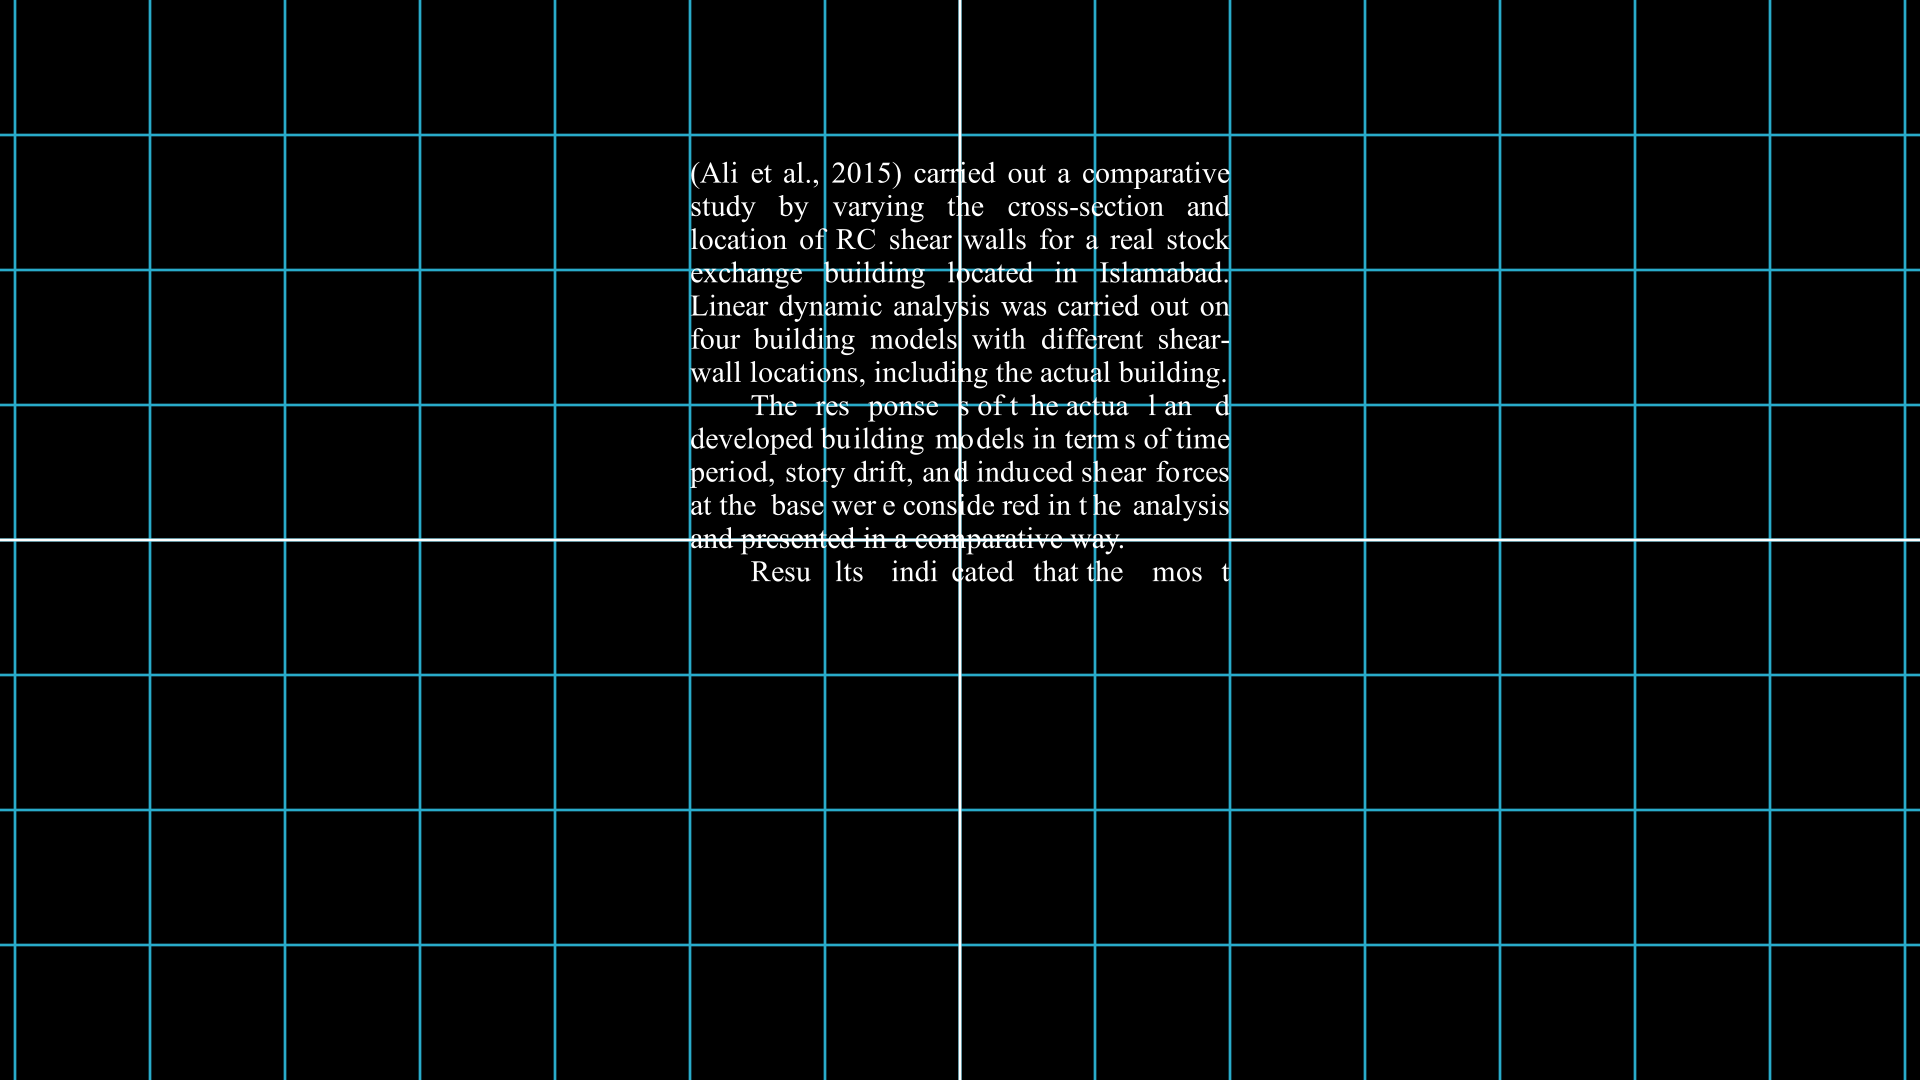

In [22]:
%%manim -s -v WARNING Example
class Example(Scene):
    def construct(self):
        biblio_title = Title("Bibliography", color=RED).to_edge(UP, buff=0)
        self.add(NumberPlane())
        Ali_all = MarkupText(
            "(Ali et al., 2015) carried out a comparative study by varying "
            "the cross-section and location of RC shear walls for a real stock exchange building"
            " located in Islamabad. Linear dynamic analysis was carried out on four building "
            "models with different shear-wall locations, including the actual building.\n"
            "\tThe responses of the actual and developed building models in terms of time "
            "period, story drift, and induced shear forces at the base were considered in "
            "the analysis and presented in a comparative way.\n"
            "\tResults indicated that the most optimum case came out to be the case where "
            "shear walls incorporated as the least thickness of 153mm among other cases. "
            "This process led to a reduction of the overall weight of the structure (19% "
            "increase in time period and 26% decrease in base shear force).",
                font = 'Times New Roman',
                font_size=100,
                # height= 22,
                width= 4,
                justify=1,
                # line_spacing = 0.4,
        ).next_to(biblio_title, DOWN, buff=0.5)
        self.add(Ali_all)

In [57]:
%%manim -ql -v WARNING Example
def add_compo(title, sub1, sub2, txt_color):
            group = Text(title, color=txt_color).to_edge(UP, buff=1.2)
            sub_goup1 = Text(sub1, color=txt_color).next_to(group, DOWN+6*LEFT, buff=0.5)
            sub_goup2 = Text(sub2, color=txt_color).next_to(group, DOWN+6*RIGHT, buff=0.5)
            s1 = SurroundingRectangle(group)
            s2 = SurroundingRectangle(sub_goup1)
            s3 = SurroundingRectangle(sub_goup2)
            group.add(s1)
            sub_goup1.add(s2)
            sub_goup2.add(s3)
            brace = always_redraw(lambda:
            BraceBetweenPoints(sub_goup1.get_top(), sub_goup2.get_top(), group.get_bottom(), buff=0)
            )
            return VGroup(group, brace, sub_goup1, sub_goup2)

class Example(ZoomedScene): 
    def construct(self):
        
        vector = add_compo('title', 'sub1', 'sub2', RED)
        self.play(LaggedStart(
            *[Write(vector[i]) for i in range(4)], lag_ratio=1
            )
        )
        self.play(vector[2].animate.shift(LEFT*2))

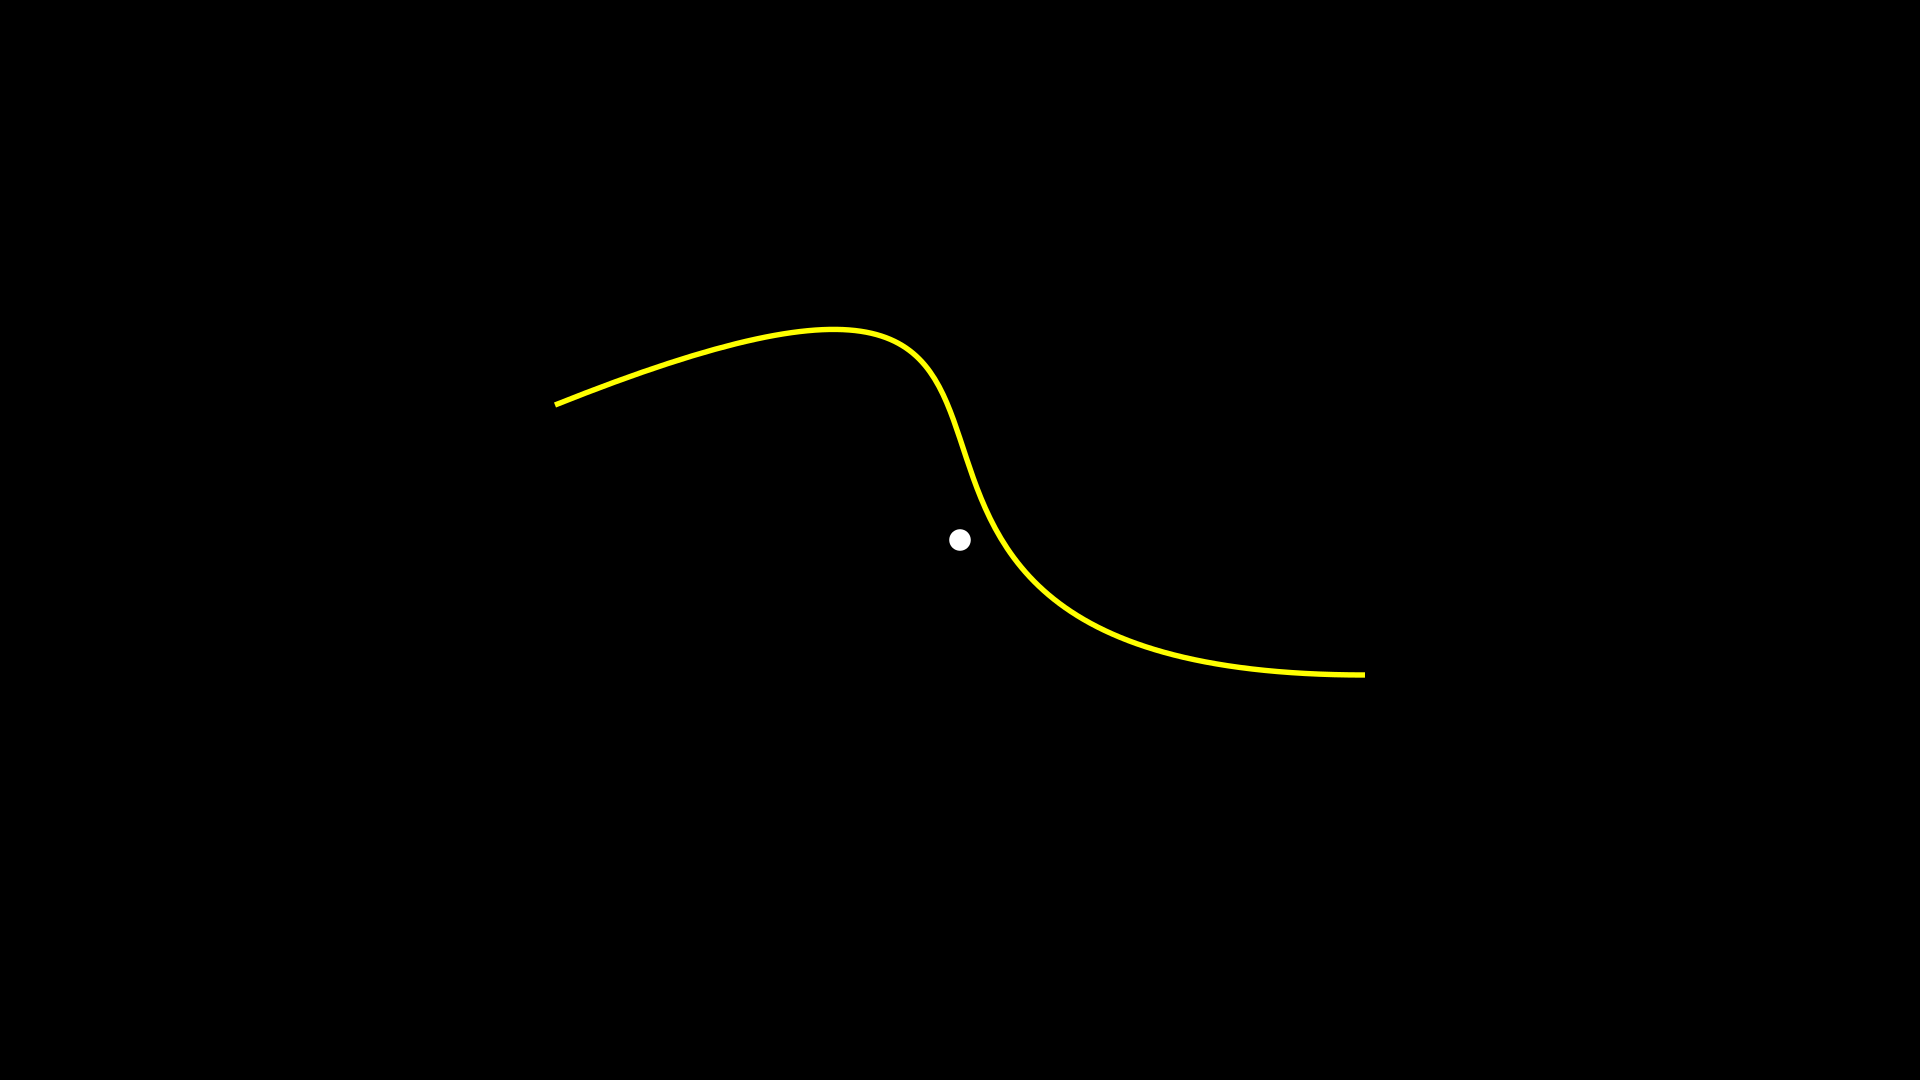

In [47]:
%%manim -s -v WARNING Example
class Example(ZoomedScene): 
    def construct(self):
        self.camera.background_rgba = True # Doesn't work .
        self.camera.init_background()
        self.add(Dot())
        
        p1 = [-3, 1, 0] 
        p1b=  p1 + 5 * RIGHT + 2 * UP 
        p2 = [3, -1, 0] 
        p2b = p2 + 5 * LEFT 
        
        mob = CubicBezier(p1,p1b, p2b, p2, color=YELLOW) 
        self.add(mob)

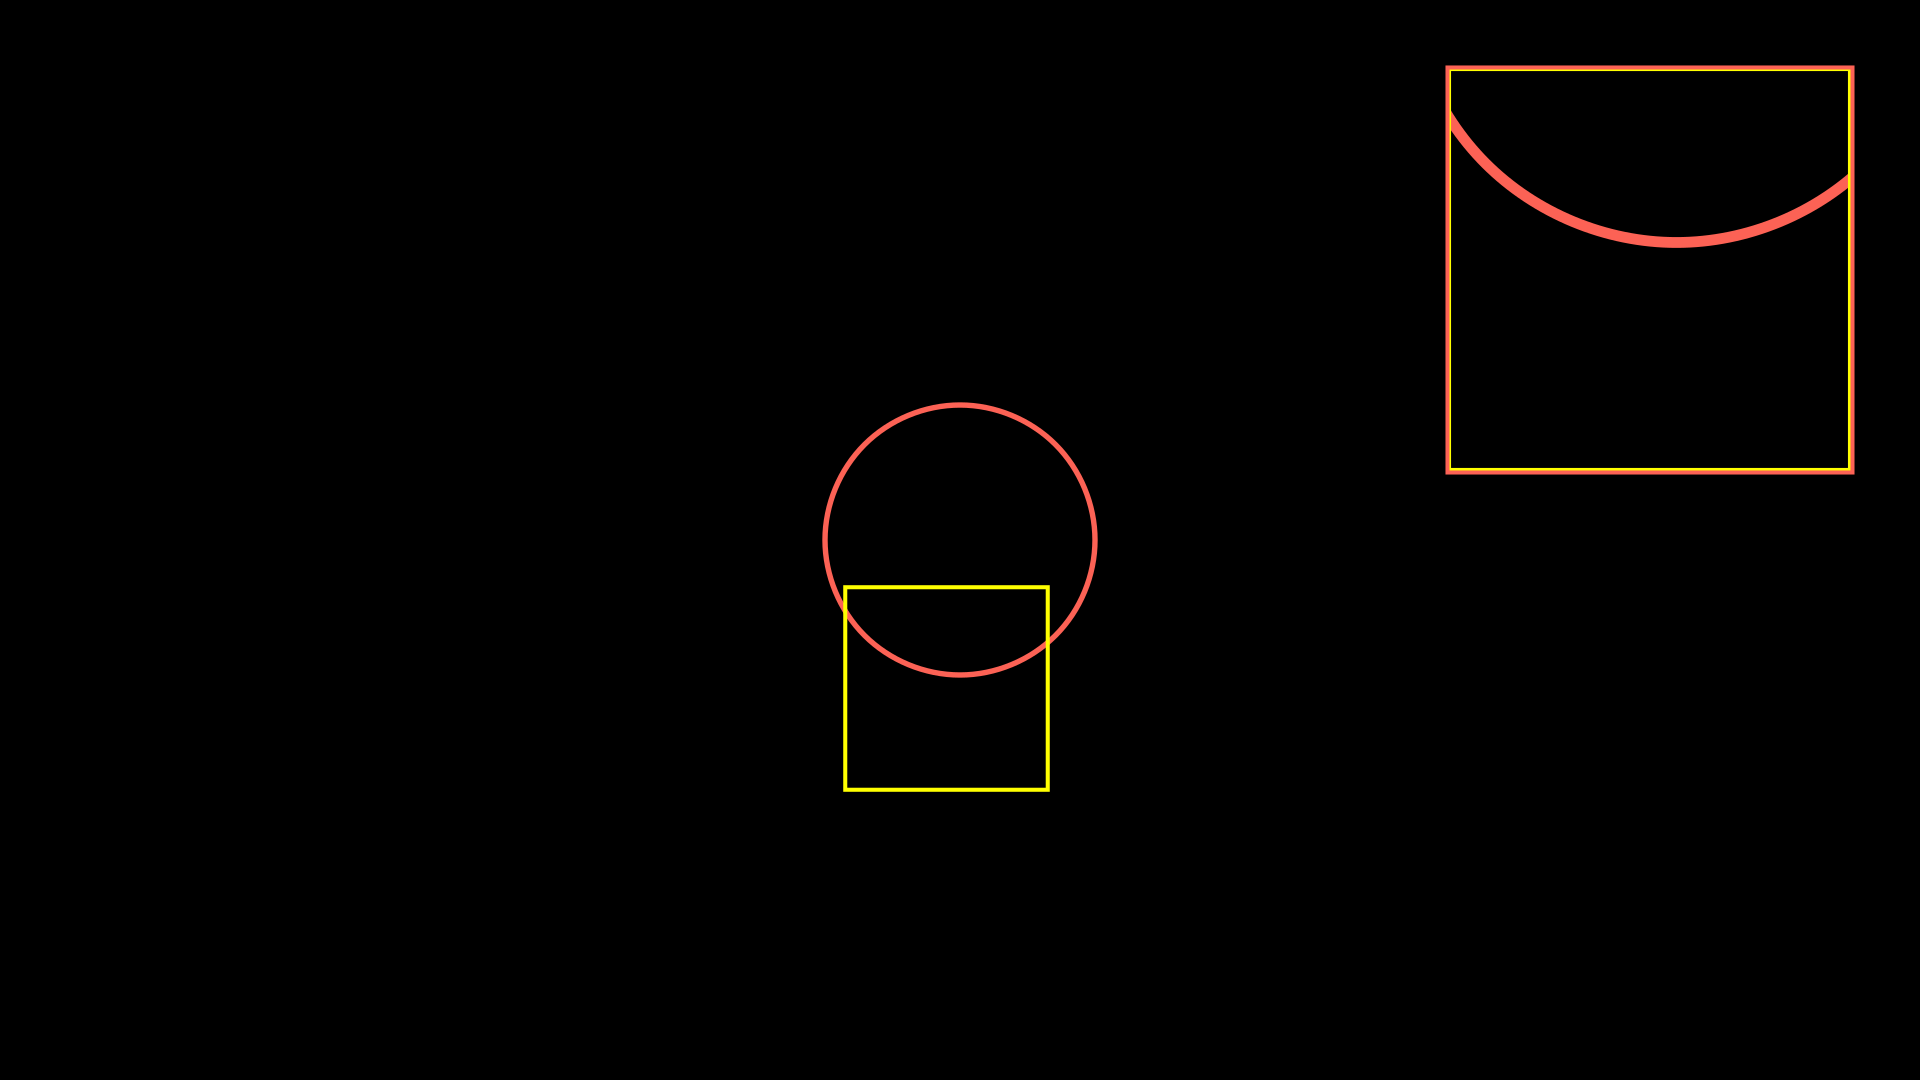

In [16]:
%%manim -s -v WARNING Example
class Example(ZoomedScene):  
    def __init__(self, **kwargs):   #HEREFROM
        ZoomedScene.__init__( 
            self, 
            zoom_factor=0.5, # the scale of the frame = the scale of the vision.
            zoomed_display_height=3, # height of the frame
            zoomed_display_width=3,  # width of the frame
            image_frame_stroke_width=1,  # stroke of the image frame
            zoomed_camera_config={  
                "default_frame_stroke_width": 3,  
                "background_opacity": 1,
            },  
            **kwargs  
        )      
        
    def construct(self): 
        self.default_frame_stroke_color = RED

        Rectangle.set_default(stroke_color=RED)
        
        ax = Circle().rotate(-0.5*PI)

        zd_rect = BackgroundRectangle(self.zoomed_display, fill_opacity=0, buff=MED_SMALL_BUFF)
        self.add_foreground_mobject(zd_rect)

        unfold_camera = UpdateFromFunc(zd_rect, lambda rect: rect.replace(self.zoomed_display))

        frame = self.zoomed_camera.frame.set_style(stroke_color= RED)
        zoomed_display_frame = self.zoomed_display.display_frame.set_style(stroke_color= RED)
        self.add(ax)

        self.activate_zooming(animate=False) # Add an initial animtaion to activate the zoom.
        self.wait()
        self.zoomed_camera.frame.set_style(stroke_color = YELLOW)
        self.play(self.zoomed_camera.frame.animate.move_to(ax.get_bottom()+0.1*DL)) # Change the initial zoomed camera frame position
        # play(self.zoomed_display.animate.shift(3*LEFT+0.4*UP)) 
        # self.play(self.zoomed_camera.frame.animate.scale([0.5, 1.5, 0]))
        self.wait()
        # self.play(self.get_zoomed_display_pop_out_animation(), unfold_camera, rate_func=lambda t: smooth(1 - t))
        # self.play(Uncreate(zoomed_display_frame), FadeOut(frame))
        
        # to the given position
         # Change the initial camera frame scale(=1)
        # to the given scale(=0.5) => shrink the frame

          #HE RETO

In [17]:
%%manim -ql -v WARNING Test
class Test(MovingCameraScene):
    def construct(self):
        self.camera.background_color = WHITE
        def __init__(self, **kwargs):
            BulletedList.__init__(self, buff = 1.5, **kwargs)

                
        a= "C:/Manim_3_feb/manim/Presentation_PhD/simp_python.png" 
        img = ImageMobject(a) 
        img.set_resampling_algorithm(RESAMPLING_ALGORITHMS["cubic"]) 
        # self.add(img)
        self.camera.background_color.save_state()
        plan_title = Title("Work plan", color=RED).to_edge(UP, buff=0)
        plan_list = Tex('I- A literature review', 'II- ffs eview')
        mob = BulletedList('I- A literature review', 'II- ffs eview')
        
        line = DashedLine()
        self.add(line)
        self.play(Wiggle(line, 2))
        self.wait()
        self.play(Restore(self.camera.frame))
        '''self.play(Create(mob[1][0].set_style(stroke_width = 2, fill_color=PURPLE_A)))
        self.wait()
        self.play(ScaleInPlace(mob[1][0], 1.5))
        self.play(Create(mob[1][1:].set_style(fill_color=GREEN_A)))'''

In [8]:
%%manim -ql -v WARNING Test
import random as rd
class Test(Scene):
    def construct(self):
        MathTex.set_default(fill_color=BLACK)
        # It will affect the SurroundingRectangle mobj, but you can set the color from stroke_color
        # Because the set_default(stroke_color) will override the color attribute.
        Rectangle.set_default(stroke_color=BLACK) 
        MarkupText.set_default(color = BLACK)
        Title.set_default(color = BLACK)
        Line.set_default(color = BLACK)
        Arrow.set_default(color = BLACK)
        Tex.set_default(color = BLACK)
        Text.set_default(color = BLACK)
        # Set the background to WHITE
        self.camera.background_color = WHITE

        self.add(
            ImageMobject("C:/Manim_3_feb/manim/Presentation_PhD/UMKBiskra_Logo.png")
            .set_opacity(0.4)
            .scale(0.5)
        )

        # self.camera.background_color = [WHITE]

        my_name = Text(
            "N. DJAFAR HENNI", font="ALGERIAN", font_size=27, color=RED
        ).to_edge(DL, buff=0)
        self.add(my_name)

        intro_title = Title("Introduction", color = RED)
        self.add(intro_title)

        Int_1 = (
            "\tIn high-seismic countries like Algeria, buildings must be designed to resist"  # from In to resist is max char
            " seismic loading. It’s well know that RC shear walls represent a structurally"  # smartly stoped at efficient
            " efficient system to stiffen an RC building under those loads."
        )
        Int_2 = ( # the spaces after (of:) are helpful because shear is in line and walls in the next line.
            "\tIn general, a shear wall system consists of a combination of:     shear walls and frames"
            " because this type of systems normally provide the required stiffness and strength"
            " to withstand lateral loads in medium-high and even low rise buildings."
        )

        intro_1 = (
            MarkupText(
                Int_1,
                font_size=60,
                unpack_groups=0,
                font="LM Roman 12",
                line_spacing=1.8,
                disable_ligatures=1,
                justify=1,  # : that is only available in MarkupText
            )
            .scale(0.4)
            .next_to(intro_title, DOWN, buff=0.5)
        )

        intro_2 = (
            MarkupText(
                Int_2,
                font_size=60,
                unpack_groups=0,
                font="LM Roman 12",
                line_spacing=1.8,
                disable_ligatures=1,
                justify=1,  # : that is only available in MarkupText
            )
            .scale(0.4)
            .next_to(intro_1, DOWN)
        )

        self.play(
            LaggedStart(Write(intro_1), Write(intro_2), lag_ratio=1),
            run_time=2,
        )
        self.wait(0.4)

        self.play( # stroke_color is not an param for surroundingrec, but we need this. see the beginning of this class.
            Create(SurroundingRectangle(intro_2[1][0:10], stroke_color=DARK_BLUE)),
            Create(
                SurroundingRectangle(intro_2[1][13:19]), stroke_color=GREEN
            ),  # 's' of frames is included
            run_time=2,
            rate_func=there_and_back_with_pause,
        )
        #
        self.wait(0.4)

        shw = intro_2[1][0:10].copy()
        fr = intro_2[1][13:19].copy()
        self.play(
            shw.animate.to_edge(UR, buff=1.5),
            fr.animate.next_to(intro_title, DOWN),
            Unwrite(intro_2),
            Unwrite(intro_1),
            run_time=4,
        )
        self.wait(1)

        self.play(Indicate(fr, 3, color = GREEN), shw.animate.set_opacity(0.2))
        self.wait(0.5)

        frame_definition = (
            MarkupText(  # /!\ Adding a new line \n will affect the justify function./!\
                "A frame is an interconnection between vertical columns and horizontal beams."
                "\nFrames bend predominantly in a shear mode deformation.",
                font_size=120,
                width = 5,
                font="LM Roman 12",
                justify=1,
                unpack_groups=0,
            )
            .align_on_border(LEFT)
        )

        L_column = Line().set_style(stroke_width=10).rotate(PI * 0.5)
        R_column = L_column.copy().shift(RIGHT * 3)
        roof = always_redraw(
            lambda: Line(start=L_column.get_end(), end=R_column.get_end())
        )
        load = always_redraw(
            lambda: Arrow(
                start=roof.get_start() - [1, 0, 0],
                end=roof.get_start(),
                buff=0
                # Try -[rd.uniform(0.3,1.6), 0, 0]
            )
        )
        shearwall = Rectangle(
            fill_color=BLUE,
            fill_opacity=1,
            height=L_column.get_length(),
            width=roof.get_length(),
        )
        shearwall.set_color_by_gradient(GREY_C).scale(0.6)
        frame = VGroup(L_column, R_column, roof, load).scale(0.6)  # , shearwall
        # Add foundations for the first storey only; It should be inside the frame I think /!\
        """fond1 = Rectangle(
            fill_color=[BLUE, WHITE, BLUE],
            fill_opacity = 1,
        ).scale(0.2).next_to(L_column, DOWN, buff=0)
        fond2 = fond1.copy().scale(0.2).next_to(R_column, DOWN, buff=0)
        fond1.add_updater(lambda mob: mob.next_to(L_column, DOWN, buff=0))
        fond2.add_updater(lambda mob: mob.next_to(L_column, DOWN, buff=0))"""

        storey_4 = always_redraw(
            lambda: VGroup(*[frame.copy() for _ in range(4)])
            .arrange(UP, buff=-0.1)
            .next_to(
                fr, DOWN, buff=0.4
            )  # Force buffer to be 0 even in the presence of arrow tips.
        )

        # storey_4[0].add(fix1,fix1) # just put them inside ( , ), not in a list like that []

        loads = VGroup()
        for element in storey_4:

            if element == storey_4[0]:
                self.play(
                    # Create(fond1),
                    # Create(fond2),
                    Create(element[:-1]),
                    Write(frame_definition[:3]),
                    run_time=3,
                )  # loads are not included (-1)
                # here add support for the first storey
            else:
                self.play(Create(element[:-1]))
            loads.add(element[3])

        self.wait()

        self.play(FadeIn(loads, shift=RIGHT * 7, scale=2))
        self.wait(0.05)
        
        self.play( # Frame shear mode
            storey_4.animate( rate_func=there_and_back_with_pause)
            .apply_function(  
                # lambda p: p + np.array([np.sqrt(abs(p[1]))*p[1]**2,0, 0]
                lambda p: p + np.array([np.sin(p[1]), 0, 0])
            )
            .set_color([RED, YELLOW, RED]),
            Write(frame_definition[3:].shift(DOWN)),  # Write the rest of the text simultaneously
            run_time=3,
        )
        
        self.wait(0.3)
        
        self.play(Unwrite(frame_definition))
        self.wait()
        self.play(fr.animate.set_opacity(0.3).to_edge(LEFT))
        def storey_op(mob):
            mob.set_opacity(0.3)
        storey_4.add_updater(storey_op)
        # /!\ Don't forget to remove this updater afterwards.
        self.wait()
        

        shearwalls = VGroup()
        for i in range(4):
            shearwalls.add(shearwall.copy())
            print(shearwalls)

        sw_support = always_redraw(lambda: Rectangle(
            fill_color=[BLUE, WHITE, BLUE],
            fill_opacity=1,
            height=0.6,
            width=shearwall.get_width() + 0.6,
        ).next_to(shearwalls, DOWN, buff=0)
        )

        self.play(shw.animate.set_opacity(1).shift(3 * LEFT))

        self.play(Indicate(shw, 3, color = GREEN))

        self.wait(0.5)

        # Adding updaters for support and shear walls.
        # sw_support.next_to(shearwalls, DOWN, buff=0)
        # sw_support.add_updater(lambda mob: mob.next_to(shearwalls, DOWN, buff=0))
        shearwalls.arrange(UP, buff=0).next_to(shw, DOWN, buff=0.6)
        shearwalls.add_updater(lambda mob: mob.next_to(shw, DOWN, buff=0.6))

        shearwall_definition = (
            MarkupText(
                "Shear walls are vertical elements \nof the horizontal force"
                " resisting \nsystem. \n\nShear walls deflects predominantly \nin a "
                "bending mode deformation \nlike a cantilever, as illustrated "
                "in \nthe following animation.",
                font_size=60,
                font="LM Roman 12",
                justify=1,
                unpack_groups=0,
            )
            .scale(0.4)
            .next_to(storey_4, RIGHT, buff=0.5)
        )

        # Write on the right of the frames.
        self.play(Write(shearwall_definition[:3]))
        self.wait(0.5)
        # Creation of the shearwall support.
        self.play(Create(sw_support))

        # Creation of the shearwall.
        for element in shearwalls:
            self.play(Create(element))
        self.wait(1)

        self.play(loads.set_opacity(1).animate.next_to(shearwalls, LEFT, buff=0).shift(UP * 0.58))
        self.wait(0.2)
        
        self.play( # Shear wall flexural mode.
            shearwalls.animate(
                run_time=2, rate_func=there_and_back_with_pause
            )  # (t=0.3, pause_ratio=0.8)
            .apply_function(
                # lambda p: p + np.array([np.sqrt(abs(p[1]))*p[1]**2,0, 0]
                lambda p: p
                + np.array([np.exp(p[1] * 0.6), 0, 0])
            )
            .set_color([RED, YELLOW, RED]),
            sw_support.animate(run_time=2, rate_func=there_and_back_with_pause).shift(LEFT),
            Write(
                shearwall_definition[3:]
            ),  # Write the rest of the shearwall defi simultaneously
        )
        self.wait(0.3)


VGroup of 1 submobjects
VGroup of 2 submobjects
VGroup of 3 submobjects
VGroup of 4 submobjects


<string>:209: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.


In [67]:
%%manim -ql -v WARNING Test
class Test(Scene):
    def construct(self):
                self.play(
                    Rectangle().animate.shift(RIGHT*4), 
                    rate_func = lambda t: smooth(5 - 5 * t)
                )
                self.wait()

In [ ]:
%%manim -s -v WARNING OpeningManim
from numpy import random

class OpeningManim(Scene):
    def construct(self):
      self.camera.background_color=WHITE
      sq = Square(0.5, fill_color=GREY, fill_opacity=0.2)
      sq_small = Square(0.2)
      shear_wall = VGroup(*[sq.copy() for _ in range(60)]).arrange_in_grid(6,10, buff=0).rotate(PI*0.5)
      sq_small_group = VGroup(*[sq_small.copy().set_style(stroke_width=0.4) for _ in range(350)]).arrange_in_grid(14,25, buff=0).rotate(PI*0.5)
      rec = Rectangle(height=3, width=5,stroke_width=0, fill_color=GREY, fill_opacity=1).rotate(PI*0.5)
      SUPPORT = always_redraw( lambda: Rectangle(height=4*1.15, width=0.3,fill_color=GREY,stroke_width=0, fill_opacity=1).rotate(PI*0.5).next_to(rec, DOWN, buff=0))
      shearwall_simp = ImageMobject('simp_python.png').rotate(PI*0.5).next_to(SUPPORT, UP, buff=0)
      shearwall_simp.stretch_to_fit_width(width = rec.width).stretch_to_fit_height(rec.height).shift(UP*0.535)
      self.play(Create(rec),Create(SUPPORT))
      self.wait()
      self.add(shearwall_simp.set_opacity(0))
      self.play(AnimationGroup(*[FadeIn(i) for i in shear_wall], lag_ratio=0.1))
      # self.wait()
      self.play(Transform(shear_wall, sq_small_group))
      # self.wait()
      self.play(*[i.animate.set_opacity(random.uniform(0,1)).set_style(fill_color=BLACK) for i in sq_small_group])
      # self.wait()
      self.play(*[i.animate(run_time=3, rate_func=there_and_back).set_opacity(random.uniform(0,1)).set_style(fill_color=[WHITE]) for i in sq_small_group])
      # self.wait()
      self.play(*[i.animate(run_time=3, rate_func=there_and_back).set_opacity(random.uniform(0.6,1)).set_style(fill_color=[GREY_D]) for i in sq_small_group])
      self.play(*[i.animate.set_opacity(0).set_style(fill_color=[BLACK]) for i in sq_small_group], shearwall_simp.animate.set_opacity(1), run_time=4)
      # self.play(), run_time=2),FadeIn(shearwall_simp)

In [2]:
%%manim -ql -v WARNING JustifyText
class JustifyText(Scene):
            def construct(self):
                self.camera.background_image = 'C:/Manim_3_feb/manim_ce/SVGs_Images/Desert_Sahara.jpg'
                self.camera.init_background()
                intro_title = Title("Introduction")
                self.add(intro_title)
                
                Int_1 = (
                    "\tIn high-seismicity countries, buildings must be designed to resist" # from In to resist is max char
                    " seismic loading. It’s well know that RC shear walls represent a structurally" # smartly stoped at efficient
                    " efficient system to stiffen an RC building under those loads."
                )
                Int_2 = (
                    "\tIn general, a shear wall system consists of a combination of shear walls and frames" 
                    " because this type of systems normally provide the required stiffness and strength" 
                    " to withstand lateral loads in medium-high and even low rise buildings."
                )
                
                intro_1 = MarkupText(Int_1,
                     font_size=60, 
                     unpack_groups=0, 
                     font='LM Roman 12', 
                     line_spacing=1.8, 
                     disable_ligatures=1,
                     justify=1 # : that is only available in MarkupText
                ).scale(0.4).next_to(intro_title, DOWN, buff=0.5)
                
                intro_2 = MarkupText(Int_2,
                     font_size=60, 
                     unpack_groups=0, 
                     font='LM Roman 12', 
                     line_spacing=1.8, 
                     disable_ligatures=1,
                     justify=1 # : that is only available in MarkupText
                ).scale(0.4).next_to(intro_1, DOWN)
                
                
                self.play(LaggedStart(
                    Write(intro_1), Write(intro_2), lag_ratio=1
                    ),run_time=2,
                )
                self.wait(0.4)

                self.play(
                    Create(SurroundingRectangle(intro_2[1][13:23], color=RED)), 
                    Create(SurroundingRectangle(intro_2[1][26:32]), color=RED), # 's' of frames is included 
                    run_time=2,
                    rate_func=there_and_back_with_pause
                )
                # 
                self.wait(0.4)
                
                shw = intro_2[1][13:23].copy()
                fr = intro_2[1][26:32].copy()
                self.play(
                    shw.animate.to_edge(UR, buff=1.5),
                    fr.animate.next_to(intro_title, DOWN),
                    Unwrite(intro_2),Unwrite(intro_1),
                    run_time=4,
                )
                self.wait(1)
                
                self.play(Indicate(fr), shw.animate.set_opacity(0.2))
                self.wait(0.5)
                
                frame_definition = MarkupText(
                "A frame is an inter-\nconnection between \nvertical columns and \nhorizontal beams that \n" 
                "bends predominantly \nin a shear mode deformation.",
                     font_size=60,
                     font='LM Roman 12',
                     justify=1
                ).scale(0.4).align_on_border(LEFT)
                
                
                L_column = Line().set_style(stroke_width=5).rotate(PI*0.5)
                R_column = L_column.copy().shift(RIGHT*3)
                roof = always_redraw(lambda:Line(start=L_column.get_end(),end=R_column.get_end()))
                load = always_redraw(lambda:
                    Arrow(start=roof.get_start()-[1,0,0],end=roof.get_start(), buff=0)
                )
                shearwall = Rectangle(fill_color=BLUE, fill_opacity=1, height= L_column.get_length(), width=roof.get_length()*0.6)
                shearwall.set_color_by_gradient(GREY_C).scale(0.6)
                frame = VGroup(L_column, R_column, roof, load).scale(0.6) # , shearwall
                # frames = frame.copy()
                storey_4 = always_redraw(lambda:
                    VGroup(*[frame.copy() for _ in range(4)]).arrange(UP, buff=-0.1).next_to(fr, DOWN, buff=0.4) # Force buffer to be 0 even in the presence of arrow tips.
                )
                
                
                # storey_4[0].add(fix1,fix1) # just put them inside ( , ), not in a list like that []

                loads = VGroup()
                for element in storey_4:
                    if element==storey_4[0]:
                        self.play(Create(element[:-1]), Write(frame_definition), run_time=3) # shear walls and loads are not included (-1, -2)
                        # here add support for the first storey
                    else:
                        self.play(Create(element[:-1]))
                    loads.add(element[3])
                   # shearwalls.add(element[4])
                self.wait()

                self.play(FadeIn(loads, shift=RIGHT*7, scale=2))
                self.wait(0.05)
                
                
                self.play(
                    storey_4.animate(run_time=2).apply_function( # /!\shear walls should not be included in this deformation
                        # lambda p: p + np.array([np.sqrt(abs(p[1]))*p[1]**2,0, 0]
                        lambda p: p + np.array([np.sin(p[1]), 0, 0]
                    )
                ).set_color([RED, YELLOW ,RED]),)
                self.wait(0.3)

                self.play(AnimationGroup(
                    storey_4.animate.set_opacity(0.3), #??????????
                    lag_ratio=1
                )                
                )
                
                self.wait()
                
                shearwalls = VGroup()
                for i in range(4):
                    shearwalls.add(shearwall.copy())
                    print(shearwalls)
                shearwalls.arrange(UP, buff=0).next_to(shw, DOWN, buff=0.6)
                shearwalls.add(Rectangle(height=1, width=3).next_to(shearwalls[0], DOWN, buff=0))
                self.play(*[Create(element) for element in shearwalls]) # shear walls and loads are not included (-1, -2)
                self.wait(1)
                shearwall_definition = MarkupText('Shear walls are vertical elements \nof the horizontal force' 
                                                  'resisting \nsystem. \nShear walls deflects predominantly \nin a '
                                                  'bending mode deformation \nlike a cantilever, as illustrated '
                                                  'in \nthe following animation.',
                                                  font_size=60,
                                                  font='LM Roman 12',
                                                  justify = 1,

                ).scale(0.4).next_to(shearwalls, LEFT, buff=1)

                self.play(Write(shearwall_definition))
                
                self.play(loads.animate.next_to(shearwalls, LEFT, buff=0).shift(UP*0.58))
                self.wait()
                '''
                interactions = VGroup()
                # for jf, fd in zip(range(4), [1, 0.6, 0.3, 0.15])
                inter1 = always_redraw(lambda:
                    Arrow(start=storey_4[0][4].get_corner(UL),end=storey_4[0][1].get_end(), color=RED_B, buff=0)
                )
                # self.add(inter1)
                # self.play(shearwalls.animate(run_time = 2).shift(RIGHT*3))
                # self.wait() #Always end with wait
                # 
                '''

KeyboardInterrupt: 

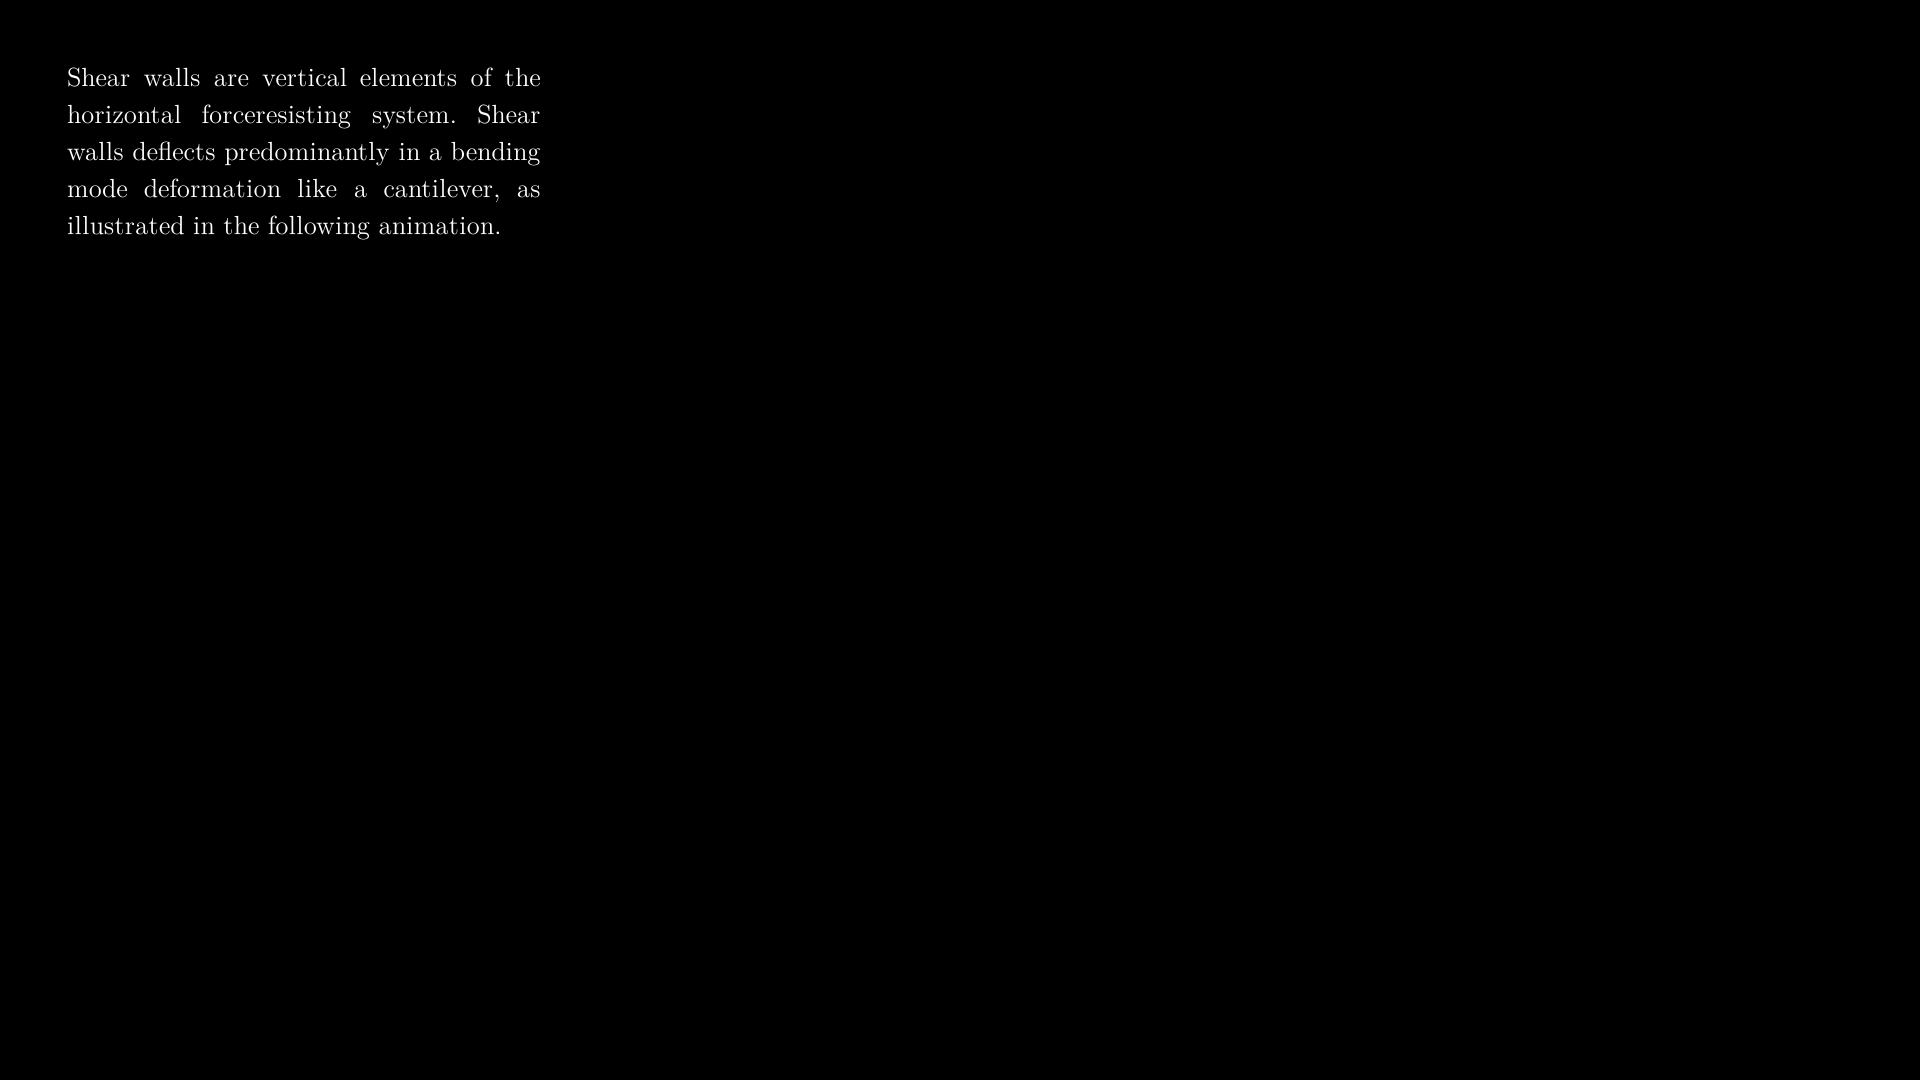

In [11]:
%%manim -s -v WARNING JustifyText
class JustifyText(Scene):
            def construct(self):
                shearwall_definition = MarkupText('Shear walls are vertical elements of the horizontal force' 
                                                  'resisting system. Shear walls deflects predominantly in a '
                                                  'bending mode deformation like a cantilever, as illustrated '
                                                  'in the following animation.',
                                                  font_size=100,
                                                  width = 3.5,
                                                  font='LM Roman 12',
                                                  justify = 1,
                                                  unpack_groups = 0

                ).to_edge(LEFT + UP)
                self.add(shearwall_definition)

In [ ]:
%%manim -ql -v WARNING Dots
from manim import *
from PIL import Image, ImageOps
import numpy as np
import random as r
from tqdm import tqdm

img = Image.open("simp_python.png")
dot_map = np.zeros(img.size)
size = img.size[0]
img = np.array(ImageOps.grayscale(img))
img = img.T[:,::-1]

count = 125000

class Dots(Scene):
    def construct(self):
        dots = []
        for i in tqdm(range(count)):
            test = True
            while test:
                x = r.randint(0, size-1)
                y = r.randint(0, size-1)

                if dot_map[x,y] == 0:
                    test = False
                else:
                    dot_map[x,y] = 1

            d = Dot([(x/size)*10-5,(y/size)*10-5,0], 0.01)

            dots.append(Succession(FadeIn(d, runtime=0.1), FadeToColor(d, "#" + hex(img[x,y])[2:]*3, run_time=3)))

        self.play(AnimationGroup(*dots, lag_ratio=0.00005))
        self.wait(5)

If you have executed the cell successfully, a message printing the installed version of the library should have appeared below it.

## Your first Scene

Manim generates videos by rendering *Scenes*. These are special classes that have a `construct` method describing the animations that should be rendered. (For the sake of this tutorial it doesn't matter if you are not that familiar with Python or object-oriented programming terminology like *class* or *method* – but you should consider working through a Python tutorial if you want to keep learning Manim.)

Enough of fancy words, let us look at an example. Run the cell below to render and display a video.

In [ ]:
%%manim -v WARNING -qm CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()

In [7]:
%%manim -v WARNING -qm CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
                L_column = Line().set_style(stroke_width=10).rotate(PI*0.5)
                R_column = L_column.copy().shift(RIGHT*3)
                roof = always_redraw(lambda:Line(start=L_column.get_end(),end=R_column.get_end()))
                load = always_redraw(lambda:
                    Arrow(start=roof.get_start()-[1,0,0],end=roof.get_start(), buff=0)
                )
                shearwall = Rectangle(fill_color=BLUE, fill_opacity=1, height= L_column.get_length(), width=roof.get_length()*0.6)
                shearwall.set_color_by_gradient(GREY_C).scale(0.6)
                frame = VGroup(L_column, R_column, roof, load).scale(0.6) # , shearwall
                # frames = frame.copy()
                fr = Text('Frames').to_edge(UP)
                storey_4 = always_redraw(lambda:
                    VGroup(*[frame.copy() for _ in range(4)]).arrange(UP, buff=-0.1).next_to(fr, DOWN, buff=0.4) # Force buffer to be 0 even in the presence of arrow tips.
                )
                
                
                loads = VGroup()
                for element in storey_4:
                    if element==storey_4[0]:
                        self.play(Create(element[:-1]), run_time=3) 
                        # here add support for the first storey
                    else:
                        self.play(Create(element[:-1]))
                    loads.add(element[3])
                   # shearwalls.add(element[4])
                self.wait()
                
                self.play(FadeIn(loads, shift=RIGHT*7, scale=2))
                self.wait(0.05)
                
                
                self.play(
                    storey_4.animate(run_time=2).apply_function( # /!\shear walls should not be included in this deformation
                        
                        lambda p: p + np.array([np.sin(p[1]), 0, 0]
                    )
                ).set_color([RED, YELLOW ,RED]),)
                self.wait(0.3)

                self.play(fr.animate.set_opacity(0.3).to_edge(LEFT))
                self.play(storey_4.animate.set_opacity(0.1))
                self.wait()


While parts of this example might seem self-explanatory, we'll still go over it step by step. First,
```
%%manim -v WARNING -qm CircleToSquare
```
is a *magic command*, it only works within Jupyter notebooks. It is very similar to how you would call `manim` from a terminal: `-v WARNING` mutes information that isn't that relevant for us right now (you can try to run the cell after removing it to see what it does). The flag `-qm` controls the render quality, it is shorthand for `--quality=m`, medium rendering quality. This means that the video will be rendered in 720p with 30 fps. (Try to change it to `-qh` or `-ql` for *high* and *low* quality, respectively!)

Finally, `CircleToSquare` is the name of the scene class you want to render in this particular cell, which already brings us to the next few lines:
```py
class CircleToSquare(Scene):
    def construct(self):
        [...]
```
This defines a Manim scene named `CircleToSquare`, and defines a custom `construct` method which acts as the *blueprint* for the video. The content of the `construct` method describes what exactly is rendered in the video. 
```py
blue_circle = Circle(color=BLUE, fill_opacity=0.5)
green_square = Square(color=GREEN, fill_opacity=0.8)
```
The first two lines create a `Circle` and a `Square` object with the specified colors and fill opacities. However, these are not added to the scene yet! To do that, you either have to use `self.add`, or ...
```py
self.play(Create(blue_circle))
self.wait()
```
... by playing an animation that adds a Manim object (*Mobject*) to the scene. Within the method, `self` references the current scene, `self.play(my_animation)` can be read as "*This scene should play my animation.*" 

`Create` is such an animation, but there are many others (for example `FadeIn`, or `DrawBorderThenFill` – try them out above!). The `self.wait()` call does exactly what you would expect: it pauses the video for a while (by default: one second). Change it to `self.wait(2)` for a two-second pause, and so on.

The final two lines,
```
self.play(Transform(blue_circle, green_square))
self.wait()
```
are responsible for the actual transformation from the blue circle to the green square (plus a one second pause afterwards).

## Positioning Mobjects and moving them around

New problem: We want to create a scene in which a circle is created while simultaneously some text is written below it. We can reuse our blue circle from above, and then add some new code:

In [ ]:
%%manim -v WARNING -qm HelloCircle

class HelloCircle(Scene):
    def construct(self):
        # blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        # We can also create a "plain" circle and add the desired attributes via set methods:
        circle = Circle()
        blue_circle = circle.set_color(BLUE).set_opacity(0.5)
        
        label = Text("A wild circle appears!")
        label.next_to(blue_circle, DOWN, buff=0.5)
        
        self.play(Create(blue_circle), Write(label))
        self.wait()

Apparently, text can be rendered by using a `Text` Mobject – and the desired position is achieved by the line
```py
label.next_to(blue_circle, DOWN, buff=0.5)
```
Mobjects have a few methods for positioning, `next_to` is one of them (`shift`, `to_edge`, `to_corner`, `move_to` are a few others – check them out in our [documentation](https://docs.manim.community/) by using the search bar on the left!). For `next_to`, the first argument that is passed (`blue_circle`) describes next to which object our `label` should be placed. The second argument, `DOWN`, describes the direction (try changing it to `LEFT`, `UP`, or `RIGHT` instead!). And finally, `buff=0.5` controls the "buffer distance" between `blue_circle` and `label`, increasing this value will push `label` further down.

But also note that the `self.play` call has been changed: it is possible to pass several animation arguments to `self.play`, they will then be played simultaneously. If you want to play them one after the other, replace the `self.play` call with the lines
```py
self.play(Create(blue_circle))
self.play(Write(label))
```
and see what happens.

By the way, Mobjects naturally also have non-positioning related methods: for example, to get our blue circle, we could also create a default one, and then set color and opacity:
```py
circle = Circle()
blue_transparent_circle = circle.set_color(BLUE)
blue_circle = blue_transparent_circle.set_opacity(0.5)
```
A shorter version of this would be
```py
blue_circle = Circle().set_color(BLUE).set_opacity(0.5)
```
For now, we will stick with setting the attributes directly in the call to `Circle`.

## Animating Method calls: the `.animate` syntax

In the last example we have encountered the `.next_to` method, one of many (!) methods that modify Mobjects in one way or the other. But what if we wanted to animate how a Mobject changes when one of these methods is applied, say, when we `.shift` something around, or `.rotate` a Mobject, or maybe `.scale` it? The `.animate` syntax is the answer to this question, let us look at an example.

In [17]:
%%manim -v WARNING -qm Intro


class Intro(MovingCameraScene):
    def construct(self):
        plan = NumberPlane()
        intro = Text(r"Introduction", stroke_width=0.3, color="#189651")
        bg = Rectangle(
            fill_opacity=1, fill_color=BLACK, stroke_color="#ff073a"
        ).round_corners(0.8)
        bg.to_corner(UL, buff=0)
        title = Title("Shear walls explained").to_edge(UP, buff=0.2)
        # bg.add_updater(lambda mobj: mobj.round_corners().surround(intro))
        def update_function(mobj):
            mobj.move_to(bg.get_center())
        self.next_section(skip_animations=True)
        self.add(plan, bg)  # Order matter, else you won't see the text
        intro.add_updater(update_function)
        self.play(Write(intro), rate_func=smooth)
        self.wait()
        self.play(ApplyWave(bg))
        self.wait(0.4)
        self.play(ReplacementTransform(bg, title), FadeOut(intro), rate_func=linear)
        self.wait()
        # Moving the camera:
        self.camera.frame.save_state()
        self.play(self.camera.frame.animate.set(width=title.width * 1.2))
        self.wait(0.3)
        self.play(Restore(self.camera.frame))

Where we would normally use `announcement.next_to(blue_circle, UP, buff=0.5)` to position the text without animation, we can prepend `.animate` to the method call to turn the application of the method into an animation which can then be played using `self.play`. This works with all methods that modify a Mobject in some way:

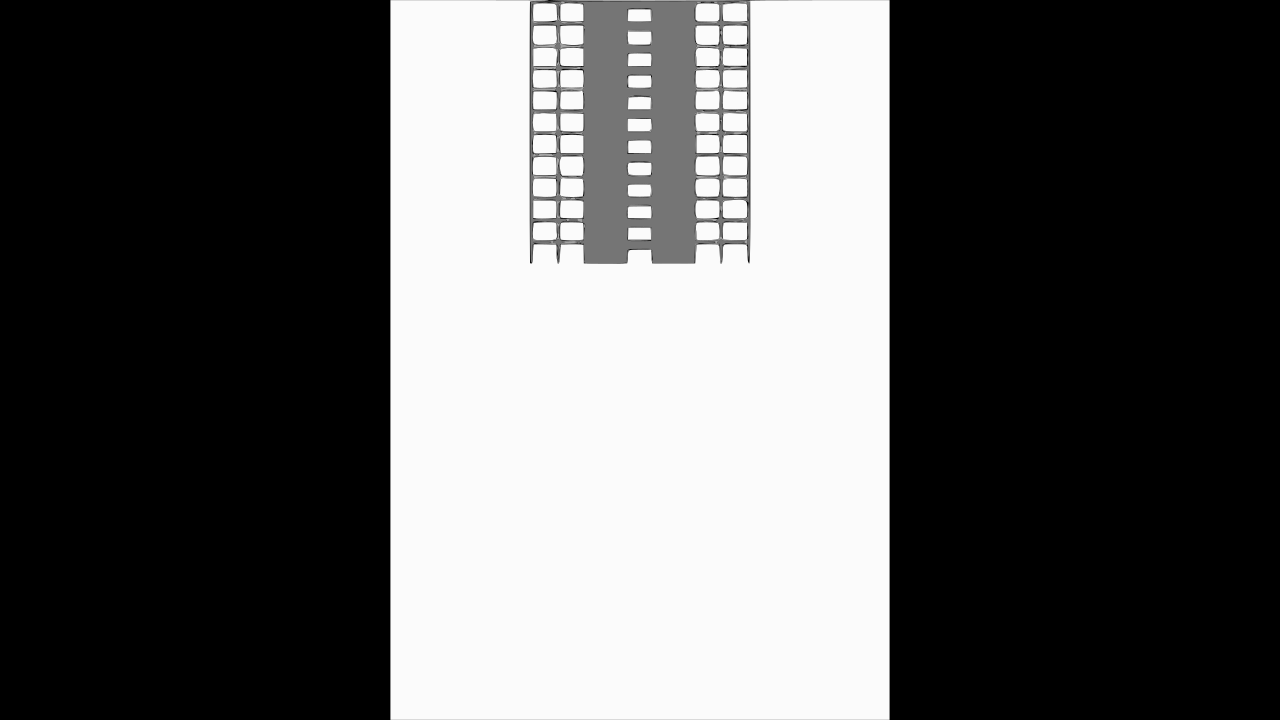

In [14]:
%%manim -v WARNING -qm AnimateSyntax

class AnimateSyntax(Scene):
    def construct(self):
        svg='C:/Manim_3_feb/manim/Presentation_PhD/image2Vector.svg'
        # self.play(DrawBorderThenFill(SVGMobject(svg)[:2].scale(4)))
        self.add(SVGMobject(svg).scale(4))

In the first play call the triangle is created, in the second it is shifted to the left, then in the third it is shifted back to the right and simultaneously scaled by a factor of 2, and finally in the fourth call it is rotated by an angle of $\pi/3$. Run the cell above again after modifying some of the values, or trying other methods like, e.g., `set_color`).

When looking closely at the last animation from the scene above, the rotation, you might notice that this is not *actually* a rotation. The triangle is transformed to a rotated version of itself, but during the animation the vertices of the triangle don't move along an arc (as they would when the triangle was rotated around its center), but rather along straight lines, which gives the animation the impression that the triangle first shrinks a bit and then grows again.

This is actually **not a bug**, but a consequence of how the `.animate` syntax works: the animation is constructed by specifying the starting state (the `triangle` Mobject in the example above), and the final state (the rotated mobject, `triangle.rotate(PI/3)`). Manim then tries to interpolate between these two, but doesn't actually know that you would like to smoothly rotate the triangle. The following example illustrates this clearly:

In [ ]:
%%manim -v WARNING -qm DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2*LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2*RIGHT)
        self.play(left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2)
        self.wait()

## Typesetting Mathematics

Manim supports rendering and animating LaTeX, the markup language mathematics is very often typeset in. Learn more about it [in this 30 minute tutorial](https://www.overleaf.com/learn/latex/Learn_LaTeX_in_30_minutes).

Here is a simple example for working with LaTeX in Manim:

In [ ]:
%%manim -v WARNING -qm CauchyIntegralFormula

class CauchyIntegralFormula(Scene):
    def construct(self):
        formula = MathTex(r"[z^n]f(z) = \frac{1}{2\pi i}\oint_{\gamma} \frac{f(z)}{z^{n+1}}~dz")
        self.play(Write(formula), run_time=3)
        self.wait()

As this example demonstrates, `MathTex` allows to render simple (math mode) LaTeX strings. If you want to render "normal mode" LaTex, use `Tex` instead.

Of course, Manim can also help you to visualize transformations of typeset formulae. Consider the following example:

In [ ]:
%%manim -v WARNING -qm TransformEquation

class TransformEquation(Scene):
    def construct(self):
        eq1 = MathTex("42 {{ a^2 }} + {{ b^2 }} = {{ c^2 }}")
        eq2 = MathTex("42 {{ a^2 }} = {{ c^2 }} - {{ b^2 }}")
        eq3 = MathTex(r"a^2 = \frac{c^2 - b^2}{42}")
        self.add(eq1)
        self.wait()
        self.play(TransformMatchingTex(eq1, eq2))
        self.wait()
        self.play(TransformMatchingShapes(eq2, eq3))
        self.wait()

In this last example, `eq1` and `eq2` have some double braces positions where, conventionally, there wouldn't be any in plain LaTeX. This is special Manim notation that groups the resulting `Tex` Mobjects `eq1` and `eq2` in a particular way.

This special notation is helpful when using the `TransformMatchingTex` animation: it will transform parts with equal TeX strings (for example, `a^2` to `a^2`) into each other – and without the special notation, the equation is considered to be one long TeX string. In comparison, `TransformMatchingShapes` is less smart: it simply tries to transform shapes that "look the same" into each other – nonetheless, it is still often very useful.

If you have made it this far, you should have a first impression of basic usage of the library. You can find a few more advanced examples that illustrate some more specialized concepts in the library below. Go ahead, try to play around and modify them just like you did for the ones above! Explore our [documentation](https://docs.manim.community) to get an idea about things that are already implemented – and look at the source code in case you want to build some more complex objects yourself.

The [community](https://www.manim.community/discord/) is certainly also happy to answer questions – and we hope you share your awesome projects with us! **Happy *manimating*!**

## Some more specialized examples

Before you delve right into these examples: please note that they illustrate specialized concepts, they are meant to give you a feeling for how more complex scenes are setup and coded. The examples don't come with additional explanation, they are **not intended as (entry level) learning resources**.

In [ ]:
%%manim -v WARNING -qm FormulaEmphasis

class FormulaEmphasis(Scene):
    def construct(self):
        product_formula = MathTex(
            r"\frac{d}{dx} f(x)g(x) =",
            r"f(x) \frac{d}{dx} g(x)",
            r"+",
            r"g(x) \frac{d}{dx} f(x)"
        )
        self.play(Write(product_formula))
        box1 = SurroundingRectangle(product_formula[1], buff=0.1)
        box2 = SurroundingRectangle(product_formula[3], buff=0.1)
        self.play(Create(box1))
        self.wait()
        self.play(Transform(box1, box2))
        self.wait()

In [ ]:
%%manim -v WARNING -qm PlotExample

class PlotExample(Scene):
    def construct(self):
        plot_axes = Axes(
            x_range=[0, 1, 0.05],
            y_range=[0, 1, 0.05],
            x_length=9,
            y_length=5.5,
            axis_config={
                "numbers_to_include": np.arange(0, 1 + 0.1, 0.1),
                "font_size": 24,
            },
            tips=False,
        )

        y_label = plot_axes.get_y_axis_label("y", edge=LEFT, direction=LEFT, buff=0.4)
        x_label = plot_axes.get_x_axis_label("x")
        plot_labels = VGroup(x_label, y_label)

        plots = VGroup()
        for n in np.arange(1, 20 + 0.5, 0.5):
            plots += plot_axes.plot(lambda x: x**n, color=WHITE)
            plots += plot_axes.plot(
                lambda x: x**(1 / n), color=WHITE, use_smoothing=False
            )

        extras = VGroup()
        extras += plot_axes.get_horizontal_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += plot_axes.get_vertical_line(plot_axes.c2p(1, 1, 0), color=BLUE)
        extras += Dot(point=plot_axes.c2p(1, 1, 0), color=YELLOW)
        title = Title(
            r"Graphs of $y=x^{\frac{1}{n}}$ and $y=x^n (n=1, 1.5, 2, 2.5, 3, \dots, 20)$",
            include_underline=False,
            font_size=40,
        )
        
        self.play(Write(title))
        self.play(Create(plot_axes), Create(plot_labels), Create(extras))
        self.play(AnimationGroup(*[Create(plot) for plot in plots], lag_ratio=0.05))

In [ ]:
%%manim -v WARNING -qm ErdosRenyiGraph

import networkx as nx

nxgraph = nx.erdos_renyi_graph(14, 0.5)

class ErdosRenyiGraph(Scene):
    def construct(self):
        G = Graph.from_networkx(nxgraph, layout="spring", layout_scale=3.5)
        self.play(Create(G))
        self.play(*[G[v].animate.move_to(5*RIGHT*np.cos(ind/7 * PI) +
                                         3*UP*np.sin(ind/7 * PI))
                    for ind, v in enumerate(G.vertices)])
        self.play(Uncreate(G))

In [ ]:
%%manim -v WARNING -qm CodeFromString

class CodeFromString(Scene):
    def construct(self):
        code = '''from manim import Scene, Square

class FadeInSquare(Scene):
    def construct(self):
        s = Square()
        self.play(FadeIn(s))
        self.play(s.animate.scale(2))
        self.wait()
'''
        rendered_code = Code(code=code, tab_width=4, background="window",
                            language="Python", font="Monospace")
        self.play(Write(rendered_code))
        self.wait(2)

In [22]:
%%manim -qm -v WARNING OpeningManim

class OpeningManim(Scene):
    def construct(self):
        title = Tex(r"This is some \LaTeX")
        basel = MathTex(r"\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}")
        VGroup(title, basel).arrange(DOWN)
        self.play(
            Write(title),
            FadeIn(basel, shift=UP),
        )
        self.wait()

        transform_title = Tex("That was a transform")
        transform_title.to_corner(UP + LEFT)
        self.play(
            Transform(title, transform_title),
            LaggedStart(*[FadeOut(obj, shift=DOWN) for obj in basel]),
        )
        self.wait()

        grid = NumberPlane(x_range=(-10, 10, 1), y_range=(-6.0, 6.0, 1))
        grid_title = Tex("This is a grid")
        grid_title.scale(1.5)
        grid_title.move_to(transform_title)

        self.add(grid, grid_title)
        self.play(
            FadeOut(title),
            FadeIn(grid_title, shift=DOWN),
            Create(grid, run_time=3, lag_ratio=0.1),
        )
        self.wait()

        grid_transform_title = Tex(
            r"That was a non-linear function \\ applied to the grid"
        )
        grid_transform_title.move_to(grid_title, UL)
        grid.prepare_for_nonlinear_transform()
        self.play(
            grid.animate.apply_function(
                lambda p: p + np.array([np.sin(p[1]), np.sin(p[0]), 0])
            ),
            run_time=3,
        )
        self.wait()
        self.play(Transform(grid_title, grid_transform_title))
        self.wait()

KeyboardInterrupt: 

In [27]:
%%manim -pql -v WARNING OpeningManim

class OpeningManim(Scene):
    def construct(self):
        self.play(
            LaggedStart(
                Write(Text("fjjf")),
                Write(Text("265")),
                Write(Text("2424")),
                lag_ratio = 1,
                run_time=3
            )
        )